# hash table + MD5 學習歷程與介紹

## Hash Table 與 Hash Function 原理

### **`hash table 雜湊表`** ：
亦稱「**哈希表**」，是根據鍵（Key）而直接查詢在內存存儲位置的資料結構。  
它通過計算一個關於鍵值的函數，也就是「**雜湊函數hash function**」，  
將所需查詢的數據映射到雜湊表中一個位置來查詢記錄，此方法加快了查找速度。  
  
### **`hash function 雜湊函數`** ：
又稱「雜湊演算法」，能使查詢數據的過程更迅速且準確的方法。  
雜湊函式把訊息或資料壓縮成摘要，使得資料量變小，將資料的格式固定下來。  
通常用一個短的隨機字母和數字組成的字串來代表。  

#### 關於雜湊函數的幾種方法：  
1. 直接定指法：取關鍵字或關鍵字的某個線性函數值為雜湊地址。
2. 數字分析法：假設關鍵字是以r為基的數，並且哈希表中可能出現的關鍵字都是事先知道的，則可取關鍵字的若干數位組成哈希地址。
3. 平方取中法：取關鍵字平方後的中間幾位為哈希地址。
4. 折疊法：將關鍵字分割成位數相同的幾部分（最後一部分的位數可以不同），然後取這幾部分的疊加和（捨去進位）作為哈希地址。
5. 隨機數法
6. 除留餘數法：取關鍵字被某個不大於雜湊表表長m的數p除後所得的餘數為雜湊地址。  

但若數據出現相同的雜湊地址機率是非常高的，此情況被稱為「**衝突**」。  
為了知道衝突產生的相同雜湊函數地址所對應的關鍵字，必須選用另外的雜湊函數，或者對衝突結果進行處理。  
方法有：開放定址法、單獨鍊表法、雙雜湊、再雜湊等等。

### **`關於add、remove與contains我的見解與邏輯：`**：
#### 關於add---我的想法： 
**功能：將值加入hash table中。**  
1. 先將要add進去的值加密  
2. 將加密的值經過處理換算成16進位的數字，然後將該數字除以10，取餘數  
3. 餘數為capacity的位置
4. 將該key值，加入進前步驟算出的位置
5. 開始走訪該capacity，若該capacity中有值，  
   則繼續在該capacity中以Linked List的方式走訪直到最後，  
   並將該值加入於整個Linked List的最後一個點。

#### 關於contain---我的想法：  
**功能：檢查該值是否存在於hash table中。**  
1. 先將要檢查是否contain的key值加密  
2. 將加密的值經過處理換算成16進位的數字，然後將該數字除以10，取餘數  
3. 餘數為capacity的位置
4. 利用換算後的加密的值去比對檢查data中該位置的所有值，是否存在我們要檢查的key值
5. 走訪capacity的方式：我的想法跟add是類似的，  
   若該capacity中有值，則開始走訪，直到遇到目標尋找值，回傳True，  
   若走訪到該capacity的最後一個值，都未遇到目標尋找值，則回傳False。  
   同樣的，若該capacity為空，直接回傳False即可。

#### 關於remove---我的想法：  
**功能：將值從hash table中移除。**  
1. 先將要remove的值加密  
2. 轉換加密的值成為16進位的數字  
3. 除以10取餘數，該餘數為capacity的位置  
4. 至該位置依序尋找，若該數等於我們目標刪除的值，則將該數以其下一位取代。   
(依照ListNode的撰寫方式，移除的方式即為將該數後的值連結至該數之前一個值）
5. 關於remove的走訪我在想可能會比較複雜，初步想法是：  
   若該capacity不為空，開始走訪，當遇到目標刪除值時，直接將其以該目標刪除值的下一位取代掉，  
   此走訪一直到節點為None時停止。

## 流程圖

#### 備註：
**此流程圖以capacity為5時為例**，說明add remove contains 函數的使用邏輯，  
若capacity不為5，就將步驟四中的餘數再除以capacity的數量，並取餘數，  
此新的餘數即為要放入之capacity的位置編號。

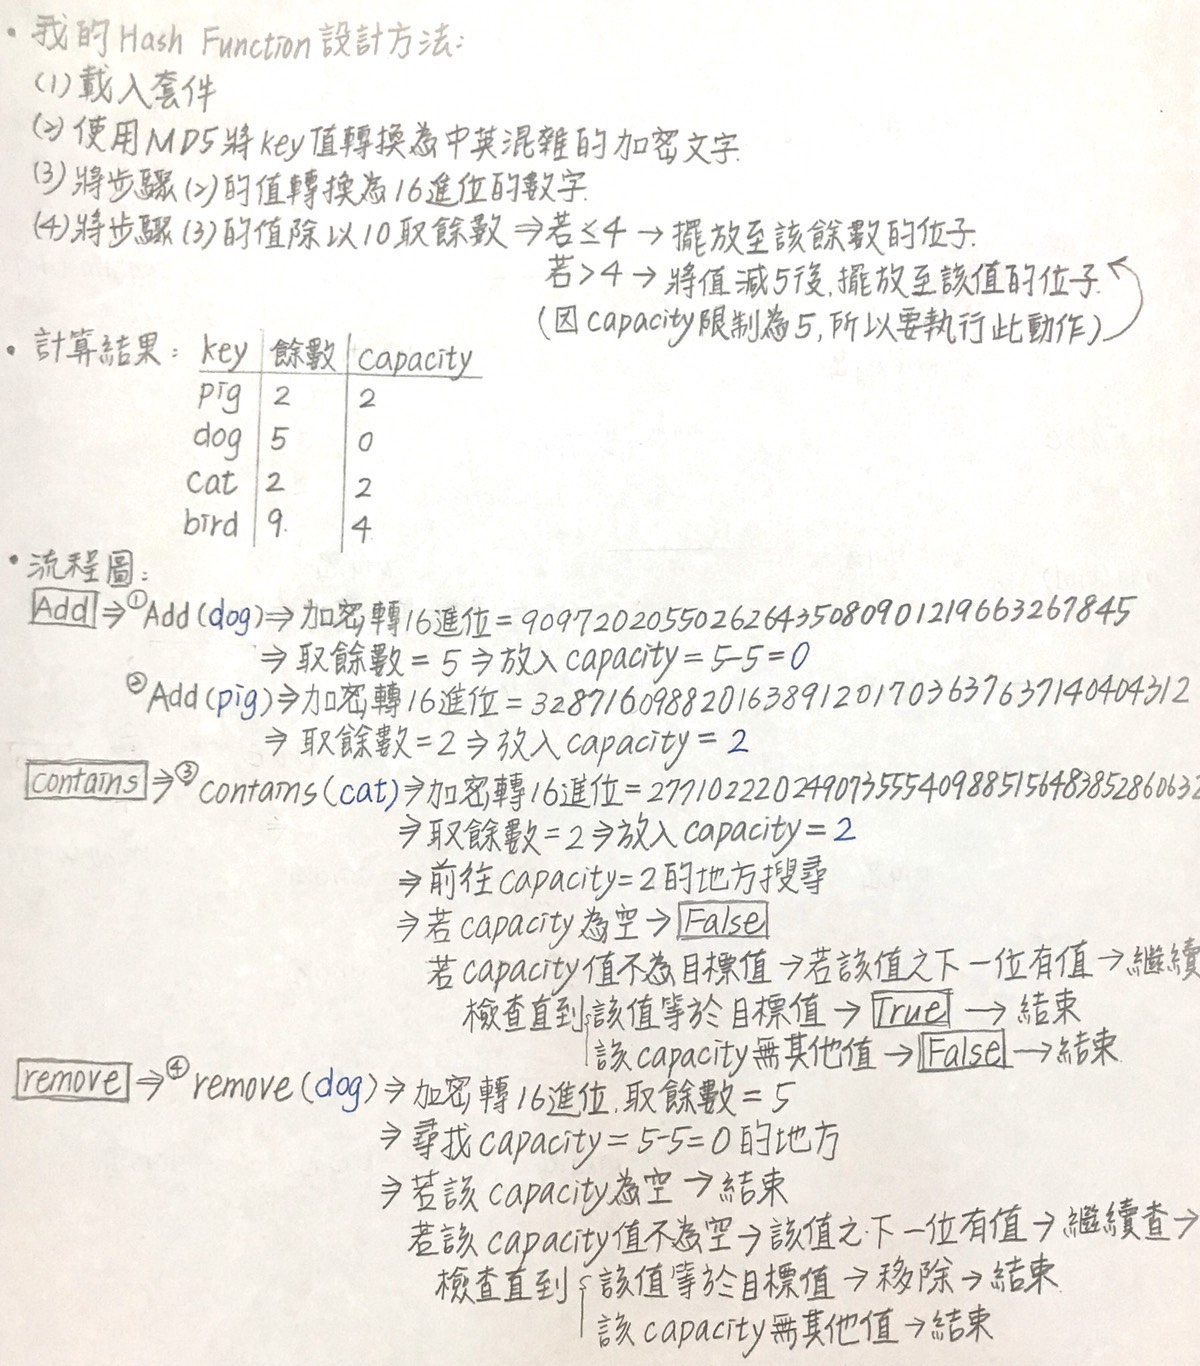

In [41]:
from IPython.display import Image
Image(filename="hash_table流程圖1.jpg")

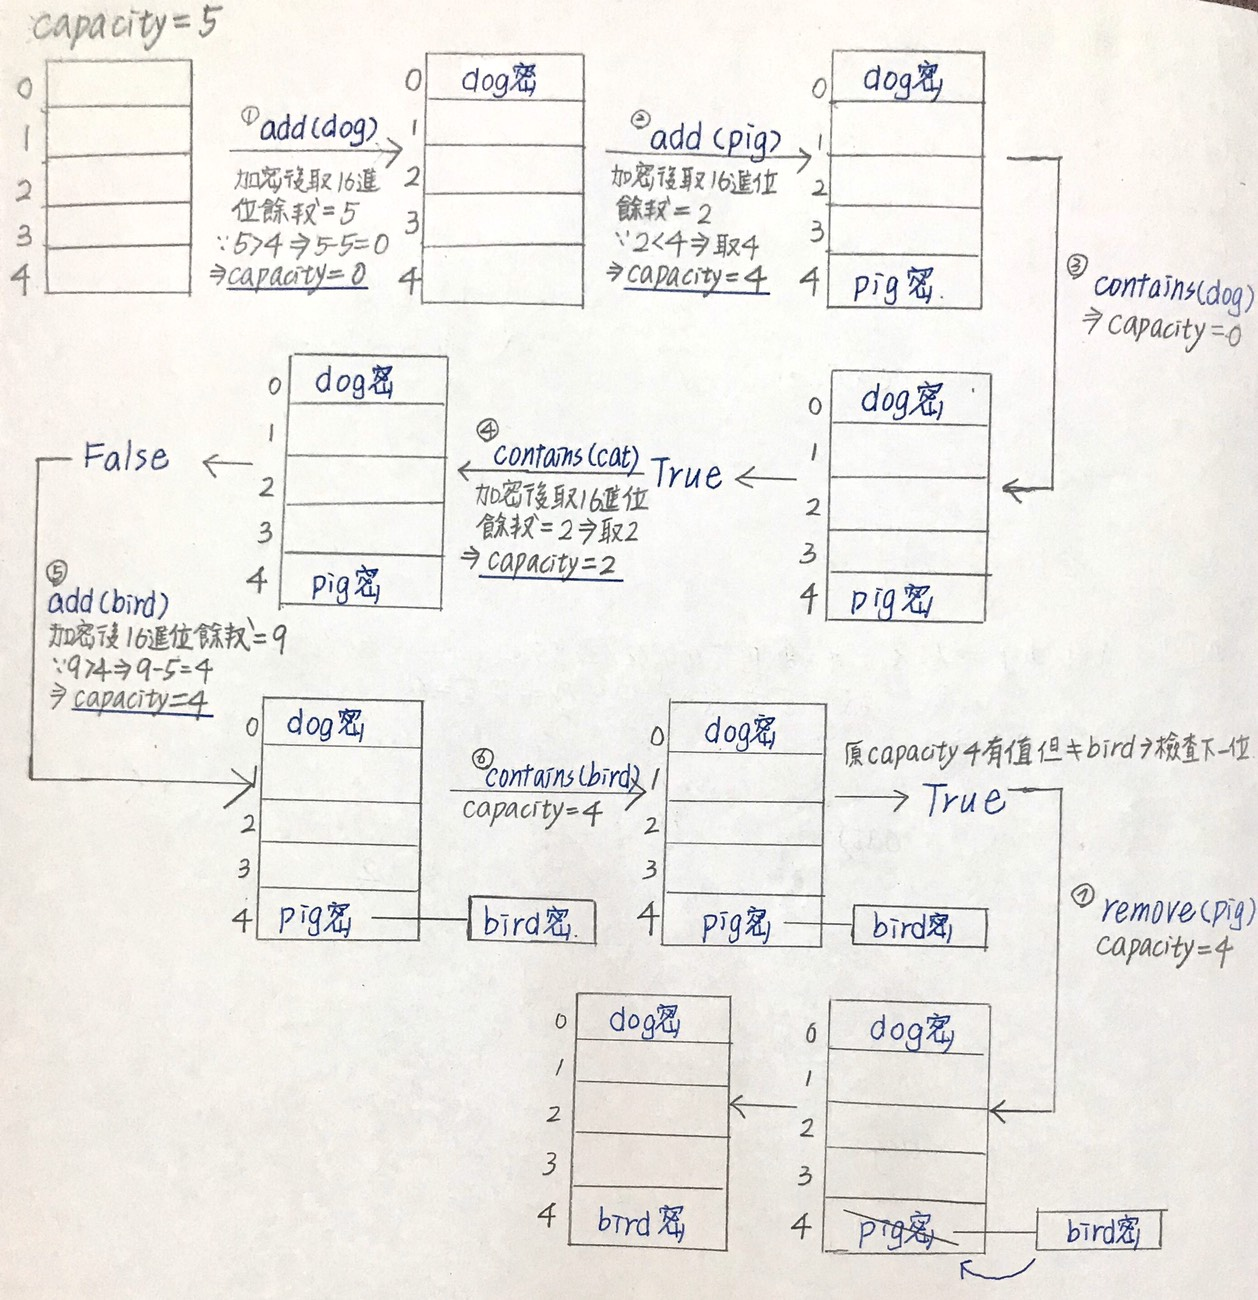

In [42]:
from IPython.display import Image
Image(filename="hash_table流程圖2.jpg")

先來測試看看套件的用法，加密的過程會變成什麼樣子～

In [23]:
# 測試md5的用法
class MyHashSet:
    def add(self, key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        
        return h.hexdigest(),value

In [24]:
print(MyHashSet().add('8'))
print(type(MyHashSet().add('8')))

('c9f0f895fb98ab9159f51fd0297e236d', 268426020319259673719831598091001013101)
<class 'tuple'>


因為加密結果會是中英混雜的一串string形態的文字，  
所以先把它換成16進位的一串數字，這樣才方便後續的處理～  
我的想法是要先將它轉成數字後，  
再除以10，餘數則代表他將會放進的blucker的位子。

In [60]:
#將測試結果換算成數字
class MyHashSet:
    def add(self, key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)   #轉換成16進位的數字
        num = value%10 #取該數字的餘數為num
        
        return value,num

In [45]:
print(MyHashSet().add('pig'))
print(type(MyHashSet().add('pig')))

(328716098820163891201703637637140404312, 2)
<class 'tuple'>


In [46]:
print(MyHashSet().add('dog'))
print(type(MyHashSet().add('dog')))

(9097202055026264535080901219663267845, 5)
<class 'tuple'>


In [47]:
print(MyHashSet().add('cat'))
print(type(MyHashSet().add('cat')))

(277102220249073555409885156483852860632, 2)
<class 'tuple'>


In [63]:
print(MyHashSet().add('bird'))
print(type(MyHashSet().add('bird')))

(228205656534084130715094099373997216749, 9)
<class 'tuple'>


ok~在了解加密的過程與處理的手法後，  
可以開始從add這個def著手了～

## add & contain

關於add---我的想法：  
1. 先將要add進去的值加密  
2. 將加密的值經過處理換算成16進位的數字，然後將該數字除以10，取餘數  
3. 餘數為capacity的位置
4. 將該key值，加入進前步驟算出的位置

關於contain---我的想法：  
1. 先將要檢查是否contain的key值加密  
2. 將加密的值經過處理換算成16進位的數字，然後將該數字除以10，取餘數  
3. 餘數為capacity的位置
4. 利用換算後的加密的值去比對檢查data中該位置的所有值，是否存在我們要檢查的key值

In [30]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)   #加密換算為16進位數字
        num = value%10 #取該數字的餘數
        
        self.data.append(key) #將該數加入進該位置

In [31]:
print(MyHashSet(16).add('dog'))

None


In [16]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)   #加密換算為16進位數字
        num = value%10 #取該數字的餘數
        
        self.data[num]=value #將該換算後的數字，加入進data的指定位置
        
        return self.data
        
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)   #加密換算為16進位數字
        num = value%10 #取該數字的餘數
        
        for i in self.data: # 檢查self.data中的每個值
            if i == int(value): #當值等於我們加密後的值
                return True,self.data #回傳True
        return False,self.data

In [17]:
print(MyHashSet(16).add('dog'))
print(MyHashSet(16).contains('dog'))

[None, None, None, None, None, 9097202055026264535080901219663267845, None, None, None, None, None, None, None, None, None, None]
(False, [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None])


檢查後發現竟然值被add進去了，  
但用contains時卻讀取不到它！！  
後來檢查了一下助教的測資，再想想整個測試的邏輯後，  
發現因為在contains時，我又再重新定義了一次MyHashSet所以導致他又回歸原本都是None的格式了！  
再來重新檢查一次～

In [18]:
hashSet = MyHashSet(16)
hashSet.add('dog')
rel = hashSet.contains('dog')
print(rel)

(True, [None, None, None, None, None, 9097202055026264535080901219663267845, None, None, None, None, None, None, None, None, None, None])


終於正確了！  
在理解整個程式作業流程後，試著轉轉看整個資料的型態成為ListNode，  
以符合作業規定的要求～  
而且試試看若同時新增相同值時，會不會出現什麼問題。

In [38]:
#轉ListNode
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  #先加密原本的key值並轉換為16進位的數字
        num = value%10 #找到capacity的位子
                
        if self.data[num]==None: #若該位子為None，
            self.data[num]=ListNode(value) #直接把該值加入data中的該capacity
        elif self.data[num] != None: #若該位子原本有其他數值存在，
            self.data[num].next = ListNode(value) #將該數值的下一位加入該值
        
        return self.data

In [39]:
hashSet = MyHashSet(16)
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [41]:
hashSet.data[5].val

9097202055026264535080901219663267845

In [42]:
hashSet.data[5].next.val

9097202055026264535080901219663267845

In [43]:
#轉ListNode(contains部分)
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        #self.data[num]=value
        
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num].val==value:
            return True,self.data
        return False,self.data

In [44]:
hashSet = MyHashSet(16)
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [45]:
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [46]:
print(hashSet.data[5].val)
print(hashSet.data[5].next.val)

9097202055026264535080901219663267845
9097202055026264535080901219663267845


In [47]:
hashSet.contains('dog')

(True,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None])

好的，add跟contains的部分目前是順利完成～  
接下來試試看remove的部分  

## remove
關於remove---我的想法：  
1. 先將要remove的值加密  
2. 轉換加密的值成為16進位的數字  
3. 除以10取餘數，該餘數為capacity的位置  
4. 至該位置依序尋找，若該數等於我們目標刪除的值，則將該數移除  
(依照ListNode的撰寫方式，移除的方式即為將該數後的值連結至該數之前一個值）

In [48]:
#加remove
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        #self.data[num]=value
        
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num].val==value:
            return True,self.data
        return False,self.data
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)   #先將該key值進行加密並轉換為16進位的數字
        num = value%10 #取該值的餘數
        
        while self.data[num].val==value: #使用while迴圈，至該capacity尋找該位置的值是否等於我們要刪除的值
                self.data[num]=self.data[num].next #若等於則繼續尋找下一個值
                
        return self.data

In [49]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('dog')
hashSet.remove('dog')
print(hashSet.data[8])
hashSet.contains('dog')

AttributeError: 'NoneType' object has no attribute 'val'

這邊出現了一個error，顯示若該值為None時會出錯，  
我推測是在第二次迴圈時，若該值的下一位為None，則會出錯，  
所以先加一個if判斷看看，若有值才繼續檢查～

In [23]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
                
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num].val==value:
            return True,self.data
        return False,self.data
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        while self.data[num].val==value:
            if self.data[num].next: # 判斷該值的下一位是否為空，若不為空則將self.data[num]直接連接到下一位的值
                self.data[num]=self.data[num].next
            else:
                self.data[num].val=None
                
        return self.data

In [24]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.remove('dog')
print(hashSet.data[5])
hashSet.contains('dog')

(False,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None])

In [25]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
                
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num].val==value:
            return True,self.data
        elif self.data[num]==None:
            return False,self.data
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        while self.data[num].val==value:
            if self.data[num].next:
                self.data[num]=self.data[num].next
            else:
                self.data[num]=None
                break
                
        return self.data

In [26]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
hashSet.remove('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
print(hashSet.data[5])

None


In [29]:
hashSet.contains('dog')

AttributeError: 'NoneType' object has no attribute 'val'

可以發現在contains這個函式測試時，  
若該值已被remove，則無法回傳False，會直接因為為None而出現錯誤而無法判斷，  
所以來修改看看contains判斷的部分～

In [37]:
#加remove
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
                
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num]==None:
            return False,self.data
        if self.data[num].val==value:
            return True,self.data
            
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        while self.data[num].val==value:
            if self.data[num].next:
                self.data[num]=self.data[num].next
            else:
                self.data[num]=None
                break
                
        return self.data

In [38]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('dog')
hashSet.remove('dog')
print(hashSet.data[5])
hashSet.contains('dog')

None


(False,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None])

In [36]:
hasfSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

(True, [None, None, <__main__.ListNode object at 0x10317c0d0>, None, None, <__main__.ListNode object at 0x10317c390>, None, None, None, None, None, None, None, None, None, None])
(True, [None, None, <__main__.ListNode object at 0x10317c0d0>, None, None, <__main__.ListNode object at 0x10317c390>, None, None, None, None, None, None, None, None, None, None])
None
(True, [None, None, <__main__.ListNode object at 0x10317c0d0>, None, None, <__main__.ListNode object at 0x10317c390>, None, None, None, <__main__.ListNode object at 0x10314bdd0>, None, None, None, None, None, None])
(False, [None, None, None, None, None, <__main__.ListNode object at 0x10317c390>, None, None, None, <__main__.ListNode object at 0x10314bdd0>, None, None, None, None, None, None])


再更改了錯誤之後，發現若將原本為空而不能判斷的值直接改成None的話，  
會出現判斷時的錯誤，舉上面例子來說，  
若cat本身就不在data中，  
回傳的值為None而不是False，  
所以我們再回去檢查看看程式碼～

In [48]:
#改錯（cat）
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
        
        return self.data
    
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        current = self.data[num]

        if current==None: #加上若data為None時則回傳False的程式～
            return False,self.data
        elif current.val!=None:
            if current.val:
                if current.val!=value:
                    if current.next:
                        current=current.next
                elif current.val==value:
                    return True,self.data
            return False,self.data           
            
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        value = int(h.hexdigest(),16)  
        num = value%10
        
        while self.data[num].val==value:
            if self.data[num].next:
                self.data[num]=self.data[num].next
            else:
                self.data[num]=None
                break
                
        return self.data

In [49]:
hashSet = MyHashSet(16)
hashSet.add('dog')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [50]:
rel = hashSet.contains('dog')
print(rel)

(True, [None, None, None, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, None, None, None, None, None, None, None])


In [51]:
hasfSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

(True, [None, None, <__main__.ListNode object at 0x10316e310>, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, None, None, None, None, None, None, None])
(True, [None, None, <__main__.ListNode object at 0x10316e310>, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, None, None, None, None, None, None, None])
(False, [None, None, <__main__.ListNode object at 0x10316e310>, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, None, None, None, None, None, None, None])
(True, [None, None, <__main__.ListNode object at 0x10316e310>, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, <__main__.ListNode object at 0x103152a50>, None, None, None, None, None, None])
(False, [None, None, None, None, None, <__main__.ListNode object at 0x10317a350>, None, None, None, <__main__.ListNode object at 0x103152a50>, None, None, None, None, None, None])


來測試看看更多測值～

In [16]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def get_MD5(self,key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        ans = h.hexdigest()
        return ans
    
    def MD5_to_value(self,ans):
        value = int(ans,16)  
        return value
    
    def value_to_num(self,value):
        num = int(value%10)
        return num
        
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        if self.data[num]==None:
            self.data[num]=ListNode(value)
        elif self.data[num] != None:
            self.data[num].next = ListNode(value)
            
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        current = self.data[num]

        if current==None:
            return False
        elif current.val!=None:
            if current.val:
                if current.val!=value:
                    if current.next:
                        current=current.next
                elif current.val==value:
                    return True
            return False           
            
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        while self.data[num].val==value:
            if self.data[num].next:
                self.data[num]=self.data[num].next
            else:
                self.data[num]=None
                break

In [13]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

True
True
False
True
False


從上面測試結果來看，  
cat跟pig會位於同一個capacity中，  
因此我們來測試看看，若pig已存在時，add cat時會不會出錯～

In [19]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig') #T
print(rel)
rel = hashSet.contains('dog') #T
print(rel)
rel = hashSet.contains('cat') #F
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird') #T
print(rel)
hashSet.add('cat')
rel = hashSet.contains('cat') #T 
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)
hashSet.remove('dog')
rel = hashSet.contains('dog') #F
print(rel)
hashSet.remove('bird')
rel = hashSet.contains('bird') #F
print(rel)
hashSet.remove('cat')
rel = hashSet.contains('cat') #F
print(rel)

True
True
False
True
False
False
False
False
False


從測試結果可以看到，  
當pig已存在時，add cat時會在contains檢查時出錯！  
回頭看看程式碼，發現一開始撰寫contains跟add時，只檢查了第一位以及第二位的地方！  
所以我想用while來改改看，讓程式碼可以走訪到所有該capacity的節點檢查～

12/01：為了配合助教更改capacity的數量，  
我重新定義了每個key必須被放置進去的位置的規則，  
原本取整個數字的餘數，  
現在將此方法更改為：若餘數<=4時，則直接按照餘數的結果擺放，若餘數>4，則將餘數減去5，按照此結果擺放。  
如此才能配合capacity為5時的情況

In [1]:
class ListNode:
    
    def __init__(self, val):
        self.val = val
        self.next = None
        
class MyHashSet:
    
    # 定義出data的儲存空間
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    
    # 取得加密的MD5值
    def get_MD5(self,key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        ans = h.hexdigest()
        return ans
    
    # 將MD5加密結果轉換為16進位的數字
    def MD5_to_value(self,ans):
        value = int(ans,16)  
        return value
    
    # 將16進位數字取餘數並決定儲存之capacity編號為何
    def value_to_num(self,value):
        num = int(value%10)
        num = num%self.capacity
        #if num <=4: # 若餘數<=4則直接以餘數為儲存之capacity編號
        #    num = num
        #elif num>4: # 若餘數>4則直接以餘數-5作為儲存之capacity編號
        #    num = num-5
        return num
    
    # 將key加入hash table中
    def add(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        if self.data[num]==None: #若該capacity為空
            self.data[num]=ListNode(value) #直接將該key作為該capacity的值
        elif self.data[num] != None: #若該capacity不為空
            current=self.data[num] 
            while current: # 使用while迴圈走訪capacity中的值
                if current.next: # 若該值的下一位仍不為空
                    current=current.next # 繼續走訪
                else: # 若該值的下一位為空
                    current.next=ListNode(value) # 將該空的位子直接加上key值
                    break
    
    # 確認hash table中是否含有key值
    def contains(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        

        if self.data[num]==None: # 若該capacity為空
            return False # 回傳False
        
        current = self.data[num] #若該capacity不為空
        
        while current is not None: # 開始使用while迴圈走訪該capacity的值
            if current.val != value: # 若目前的值不等於key
                if current.next: # 且該值的下一位仍不為空
                    current = current.next # 繼續走訪
                else: # 若該值的下一位為空
                    return False # 回傳False
            elif current.val==value: # 若目前的值等於key
                return True # 回傳True
            
    # 將hash table的key值全部移除
    def remove(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        while self.data[num].val==value: # 當該capacity的值等於key值
            if self.data[num].next: # 且該值之下一位不為空
                self.data[num]=self.data[num].next # 繼續走訪
            else: # 若該值的下一位為空
                self.data[num]=None # 將該capacity定義為空
                break

In [11]:
hashSet = MyHashSet()
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig') #T
print(rel)
rel = hashSet.contains('dog') #T
print(rel)
rel = hashSet.contains('cat') #F
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird') #T
print(rel)
hashSet.add('cat')
rel = hashSet.contains('cat') #T 
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)
rel = hashSet.contains('cat') #T
print(rel)
hashSet.remove('dog')
rel = hashSet.contains('dog') #F
print(rel)
hashSet.remove('bird')
rel = hashSet.contains('bird') #F
print(rel)
hashSet.remove('cat')
rel = hashSet.contains('cat') #F
print(rel)

True
True
False
True
True
False
True
False
False
False


In [12]:
hashSet = MyHashSet(2)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig') #T
print(rel)
rel = hashSet.contains('dog') #T
print(rel)
rel = hashSet.contains('cat') #F
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird') #T
print(rel)
hashSet.add('cat')
rel = hashSet.contains('cat') #T 
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)
rel = hashSet.contains('cat') #T
print(rel)
hashSet.remove('dog')
rel = hashSet.contains('dog') #F
print(rel)
hashSet.remove('bird')
rel = hashSet.contains('bird') #F
print(rel)
hashSet.remove('cat')
rel = hashSet.contains('cat') #F
print(rel)

True
True
False
True
True
False
True
False
False
False


In [25]:
class ListNode:
    
    def __init__(self, val):
        self.val = val
        self.next = None
        
class MyHashSet:
    
    # 定義出data的儲存空間
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    
    # 取得加密的MD5值
    def get_MD5(self,key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        ans = h.hexdigest()
        return ans
    
    # 將MD5加密結果轉換為16進位的數字
    def MD5_to_value(self,ans):
        value = int(ans,16)  
        return value
    
    # 將16進位數字取餘數並決定儲存之capacity編號為何
    def value_to_num(self,value):
        num = int(value%10)
        num = num%self.capacity
        #if num <=4: # 若餘數<=4則直接以餘數為儲存之capacity編號
        #    num = num
        #elif num>4: # 若餘數>4則直接以餘數-5作為儲存之capacity編號
        #    num = num-5
        return num
    
    # 將key加入hash table中
    def add(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        if self.data[num]==None: #若該capacity為空
            self.data[num]=ListNode(value) #直接將該key作為該capacity的值
        elif self.data[num] != None: #若該capacity不為空
            current=self.data[num] 
            while current: # 使用while迴圈走訪capacity中的值
                if current.next: # 若該值的下一位仍不為空
                    current=current.next # 繼續走訪
                else: # 若該值的下一位為空
                    current.next=ListNode(value) # 將該空的位子直接加上key值
                    break
    
    # 確認hash table中是否含有key值
    def contains(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        

        if self.data[num]==None: # 若該capacity為空
            return False # 回傳False
        
        current = self.data[num] #若該capacity不為空
        
        while current is not None: # 開始使用while迴圈走訪該capacity的值
            if current.val != value: # 若目前的值不等於key
                if current.next: # 且該值的下一位仍不為空
                    current = current.next # 繼續走訪
                else: # 若該值的下一位為空
                    return False # 回傳False
            elif current.val==value: # 若目前的值等於key
                return True # 回傳True
            
    # 將hash table的key值全部移除
    def remove(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        while self.data[num].val==value: # 當該capacity的值等於key值
            if self.data[num].next: # 且該值之下一位不為空
                self.data[num]=self.data[num].next # 繼續走訪
            else: # 若該值的下一位為空
                self.data[num]=None # 將該capacity定義為空
                break

In [16]:
hashSet = MyHashSet(16)
hashSet.add('pig')
hashSet.add('cat')
hashSet.add('pig')
rel = hashSet.contains('cat') #T
print(rel)
rel = hashSet.contains('pig') #T
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)

True
True
True


12/5突然想到一個測資，就再打開了Anaconda測試，  
發現若將cat跟pig這兩項會在同位置的key交錯add進hash table，  
remove中間的值時會出現問題！  
**`回頭檢查程式碼：`**  
發現我在remove的地方只考慮到走訪時的該capacity第一個值等於value時的情況，  
因此若該capacity第一位不為value時，程式並不會執行！  
所以我要來調整看看while迴圈的部分～  
**`我的想法是：`**   
先判斷第一個值，若該值等於目標刪除value，則直接從該值的下一位開始走訪。  
走訪會派出current這個「分身」，當current的下一位不為空且不等於目標刪除值時，繼續走訪該節點的下一節點。  
而當current的下一位不為空且等於目標刪除值時，  
就將current的下一位，用Linked List的方式直接連結到他的下下位，（也就是用下下位直接取代掉目標刪除的節點位置）  
這樣的走訪會一直走到被連結的值為空時，停止。

In [1]:
class ListNode:
    
    def __init__(self, val):
        self.val = val
        self.next = None
        
class MyHashSet:
    
    # 定義出data的儲存空間
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    
    # 取得加密的MD5值
    def get_MD5(self,key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        ans = h.hexdigest()
        return ans
    
    # 將MD5加密結果轉換為16進位的數字
    def MD5_to_value(self,ans):
        value = int(ans,16)  
        return value
    
    # 將16進位數字取餘數並決定儲存之capacity編號為何
    def value_to_num(self,value):
        num = int(value%10)
        num = num%self.capacity
        #if num <=4: # 若餘數<=4則直接以餘數為儲存之capacity編號
        #    num = num
        #elif num>4: # 若餘數>4則直接以餘數-5作為儲存之capacity編號
        #    num = num-5
        return num
    
    # 將key加入hash table中
    def add(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        if self.data[num]==None: #若該capacity為空
            self.data[num]=ListNode(value) #直接將該key作為該capacity的值
        elif self.data[num] != None: #若該capacity不為空
            current=self.data[num] 
            while current: # 使用while迴圈走訪capacity中的值
                if current.next: # 若該值的下一位仍不為空
                    current=current.next # 繼續走訪
                else: # 若該值的下一位為空
                    current.next=ListNode(value) # 將該空的位子直接加上key值
                    break
    
    # 確認hash table中是否含有key值
    def contains(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        

        if self.data[num]==None: # 若該capacity為空
            return False # 回傳False
        
        current = self.data[num] #若該capacity不為空
        
        while current is not None: # 開始使用while迴圈走訪該capacity的值
            if current.val != value: # 若目前的值不等於key
                if current.next: # 且該值的下一位仍不為空
                    current = current.next # 繼續走訪
                else: # 若該值的下一位為空
                    return False # 回傳False
            elif current.val==value: # 若目前的值等於key
                return True # 回傳True
            
    # 將hash table的key值全部移除
    def remove(self, key):
        
        #先取得加密的值、16進位數以及餘數、儲存之capacity位置
        password = self.get_MD5(key)
        value = self.MD5_to_value(password)
        num = self.value_to_num(value)
        
        current = self.data[num] #設立一個current作為走訪時的「分身」
        if current: # 當current不為空且等於目標刪除value時
            if current.val == value: 
                current = current.next #直接將走訪的current從下一節點開始
                self.data[num] = current
        if current: # 當current不為空執行下面程式
            while current.next: # 當current的下一位不為空
                if current.next.val==value: # 且該值等於目標刪除value值
                    if current.next.next: # 檢查current的下下位，若不為空
                        current.next=current.next.next # 將current的下一位（也就是目標刪除的值）直接用current的下下位作替代
                    else: # current的下下位，若為空
                        current.next = None # 直接將current的下一位指定為空
                elif current.next.val!=value: # 若該值不等於目標刪除value值
                    current=current.next # 繼續走訪下一個節點

In [2]:
hashSet = MyHashSet(16)
hashSet.add('pig')
hashSet.add('cat')
hashSet.add('pig')
hashSet.add('pig')

rel = hashSet.contains('cat') #T
print(rel)
rel = hashSet.contains('pig') #T
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)

True
True
False


In [6]:
hashSet = MyHashSet(16)
hashSet.add('pig')
hashSet.add('cat')
hashSet.add('pig')
rel = hashSet.contains('cat') #T
print(rel)
rel = hashSet.contains('pig') #T
print(rel)
hashSet.remove('cat')
rel = hashSet.contains('cat') #F
print(rel)

True
True
False


In [4]:
hashSet = MyHashSet(2)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig') #T
print(rel)
rel = hashSet.contains('dog') #T
print(rel)
rel = hashSet.contains('cat') #F
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird') #T
print(rel)
hashSet.add('cat')
rel = hashSet.contains('cat') #T 
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)
rel = hashSet.contains('cat') #T
print(rel)
hashSet.remove('dog')
rel = hashSet.contains('dog') #F
print(rel)
hashSet.remove('bird')
rel = hashSet.contains('bird') #F
print(rel)
hashSet.remove('cat')
rel = hashSet.contains('cat') #F
print(rel)

True
True
False
True
True
False
True
False
False
False


In [64]:
hashSet = MyHashSet(16)
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig') #T
print(rel)
rel = hashSet.contains('dog') #T
print(rel)
rel = hashSet.contains('cat') #F
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird') #T
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig') #F
print(rel)

True
True
False
True
False


# 大功告成！～

# 參考資料：
http://practicalcryptography.com/hashes/md5-hash/  
https://www.cs.wcupa.edu/rkline/ds/hash-sets.html  
http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html  
https://toyo0103.blogspot.com/2018/04/hash-table.html   
https://zh.wikipedia.org/wiki/%E6%95%A3%E5%88%97%E5%87%BD%E6%95%B8